In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from utils import cleaner
import utils.plotter as plotter

## Training, Validation, and Test

In [3]:
date = '23-Aug-2024'
agg_trade = cleaner.clean_agg_trade('./data/input_data/'+date+'/aggTrade.csv')

## Visualizing Data

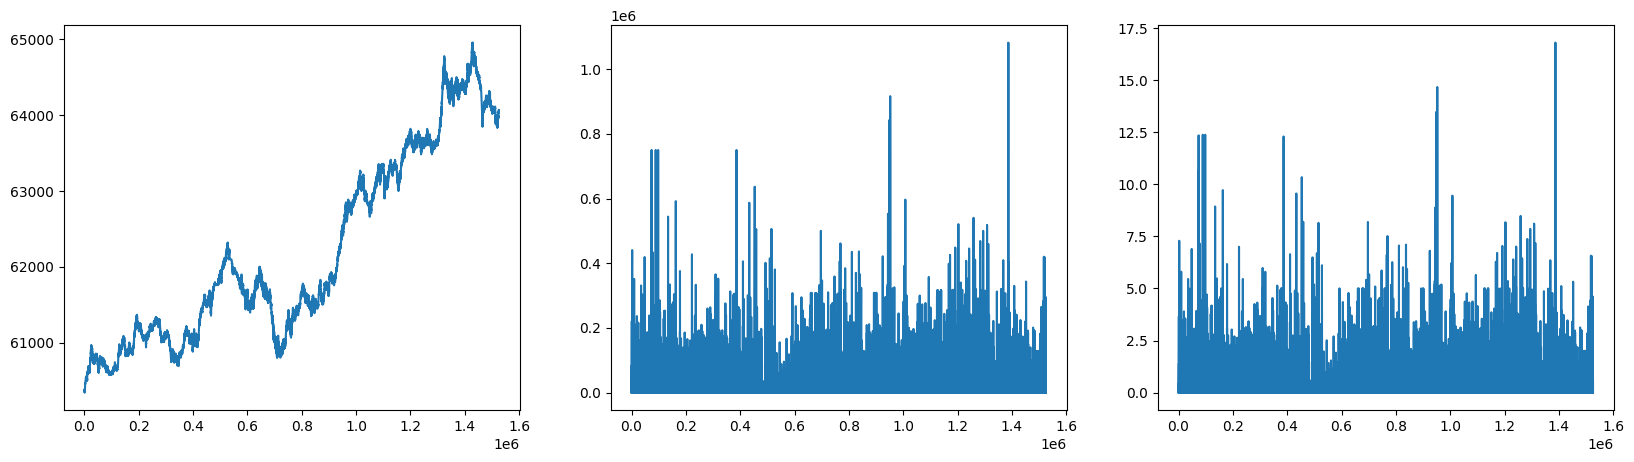

In [4]:
prices = agg_trade.price.to_list()
dollarvolume = agg_trade.dollarvolume.to_list()
quantity = agg_trade.quantity.to_list()
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0].plot(prices)
ax[1].plot(dollarvolume) 

ax[2].plot(quantity)

In [5]:
# Sample data based on dollar volume
timestamp, price, quantity = cleaner.group_by_dollarvol(agg_trade.index, prices, quantity, np.mean(agg_trade.dollarvolume))

In [6]:
trades = pd.DataFrame({'datetime':timestamp, 'price':price, 'quantity':quantity})
trades.to_csv('./data/input_data/'+date+'/aggTrade_dollarvol.csv', index=False)

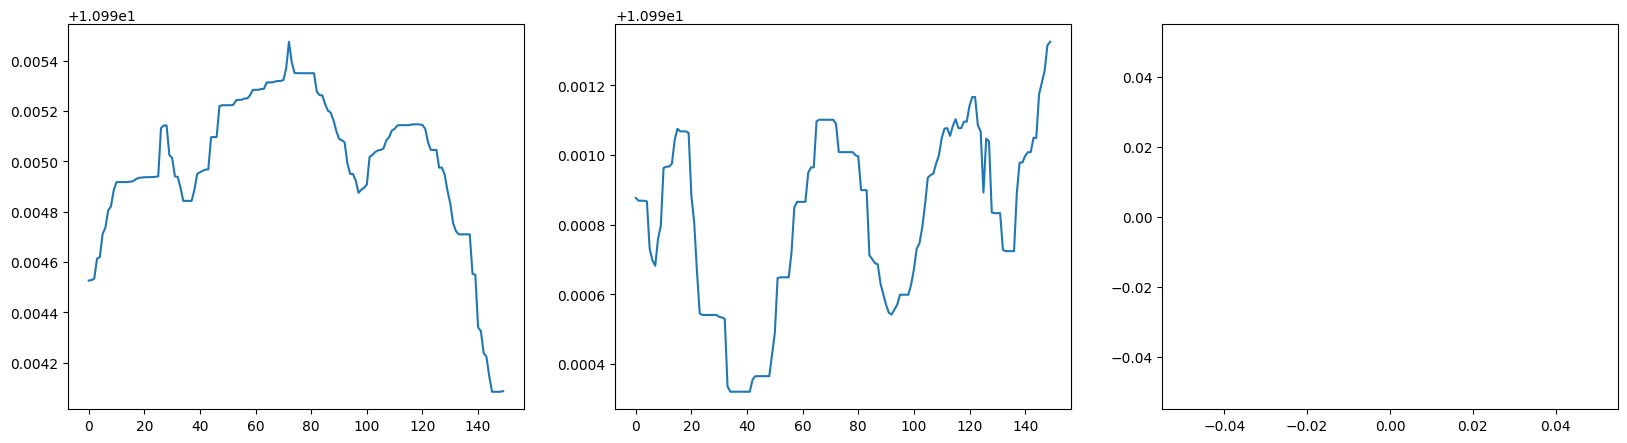

In [7]:
fig2, ax2 = plt.subplots(1, 3, figsize = (20, 5))

ax2[0].plot(np.log(price[5000:5150]))
ax2[1].plot(np.log(price[50000:50150]))
ax2[2].plot(np.log(price[600000:600150]))

(array([ 346,  729, 1331, ...,  495, 3441, 4014]), 0, 562.4889980153282, 17385)

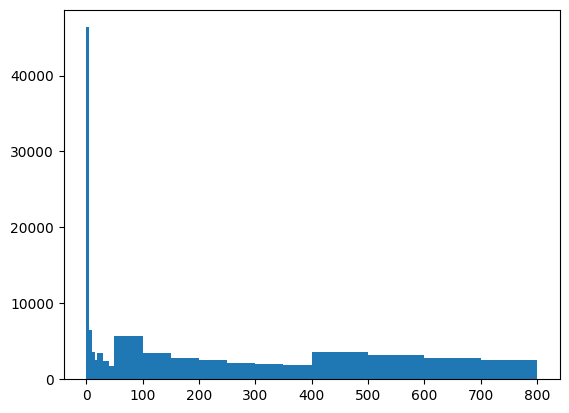

In [7]:
plotter.timediff(timestamp)

In [8]:
bookticker = pd.read_csv('./data/input_data/'+date+'/bookticker.csv')
bookticker_clean = cleaner.clean_bookticker('./data/input_data/'+date+'/bookticker.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/input_data/09-Aug-2024/bookticker.csv'

## Aggregating Data by Dollar Volume

In [5]:
dates =['23-Aug-2024','24-Aug-2024','25-Aug-2024','26-Aug-2024','27-Aug-2024','29-Aug-2024']
  

In [6]:
agg_trade_orderbook = []

for date in dates:
  agg_trade_orderbook.append(pd.read_csv(f'./data/input_data/{date}/orderbook_agg_trade.csv'))

IndexError: list index out of range

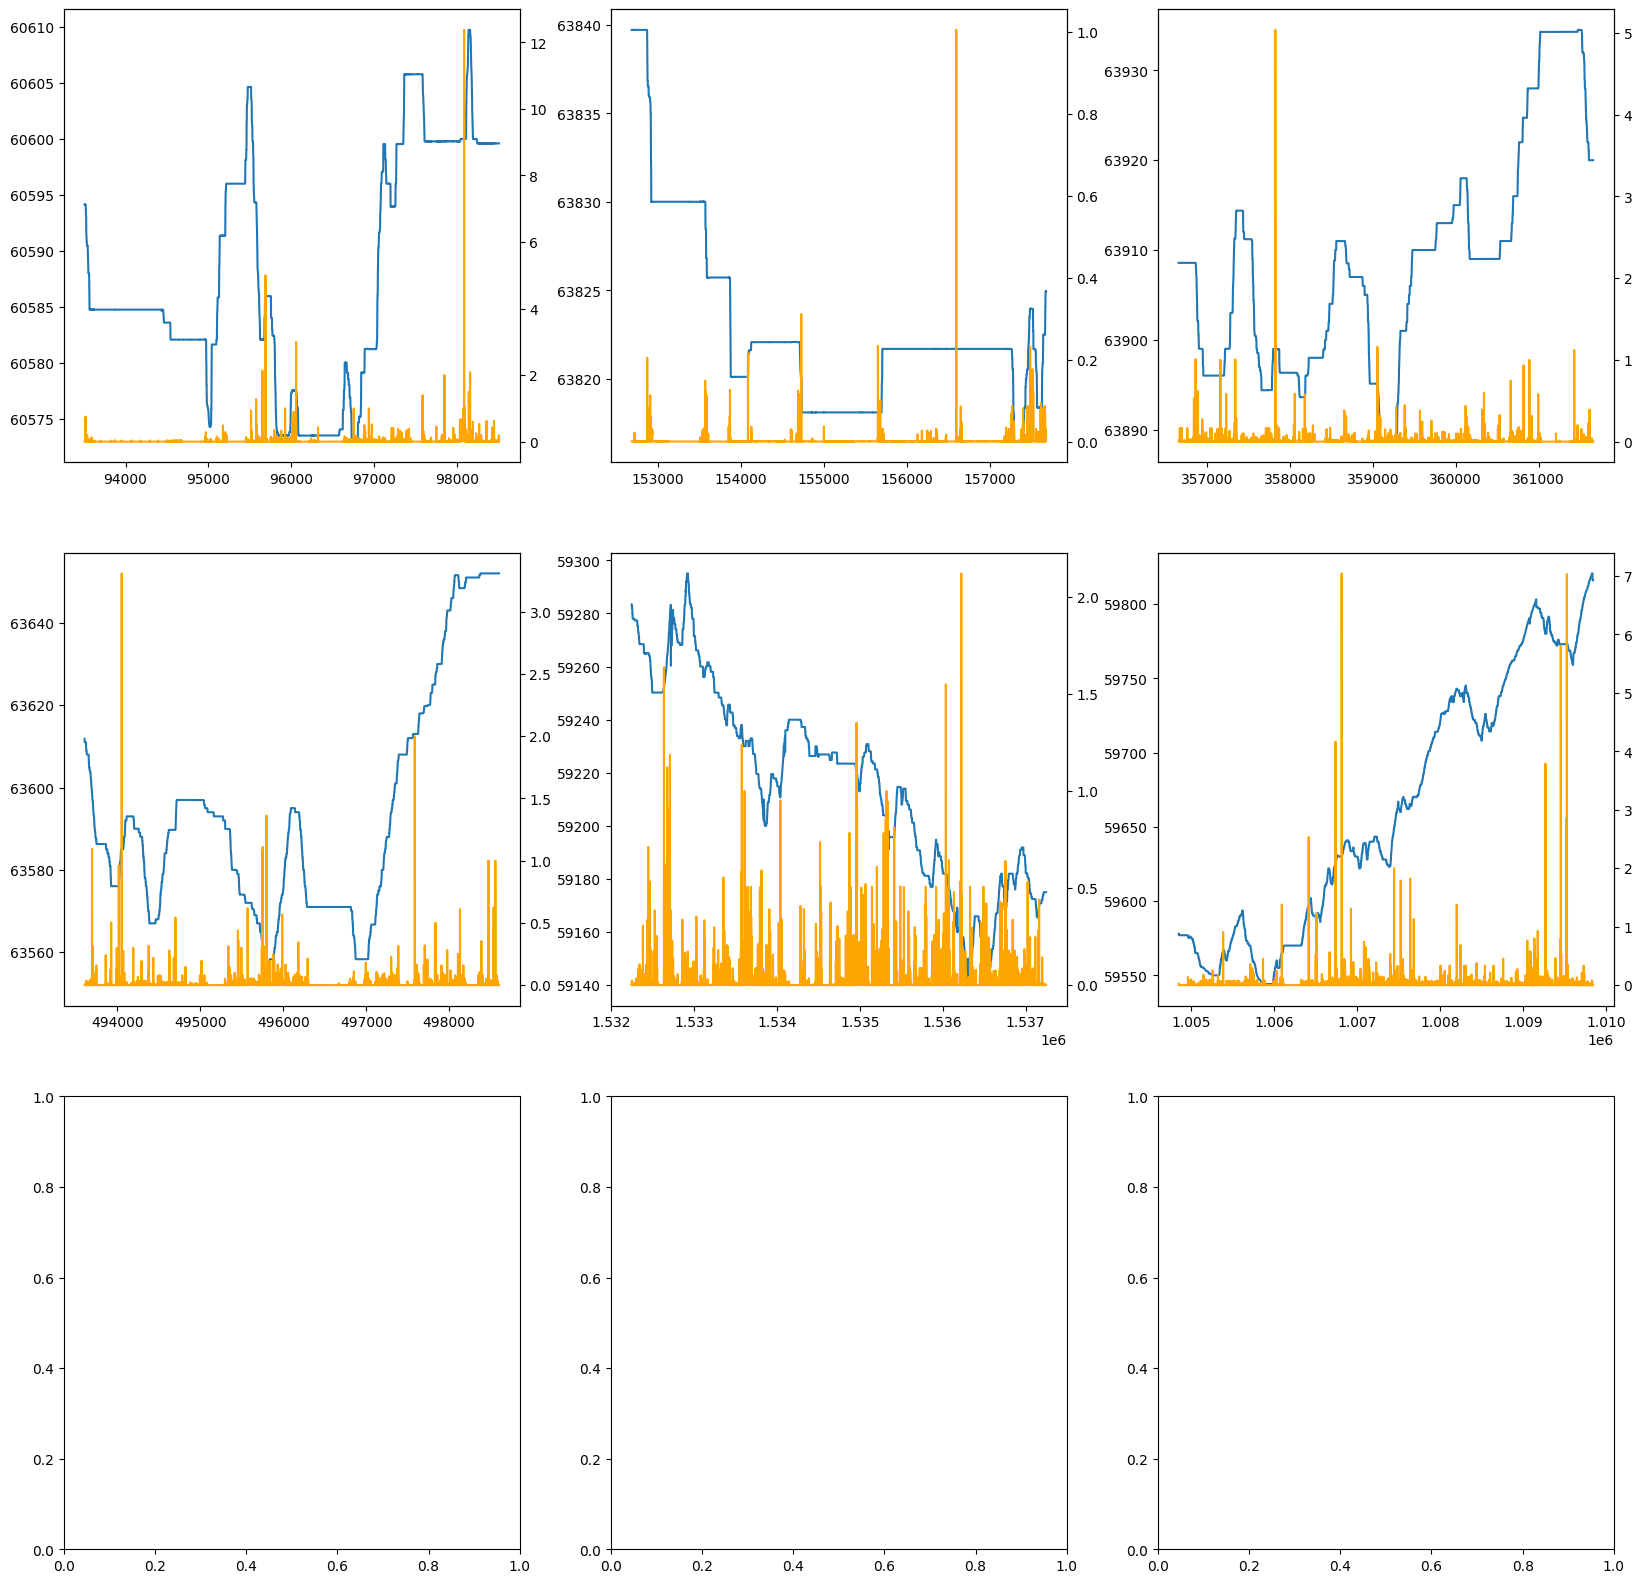

In [7]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(agg_trade_orderbook[plot_idx])-5000, size=1)
    ax2 = ax[idx][jdx].twinx()
    ax[idx][jdx].plot(agg_trade_orderbook[plot_idx].price[rand[0]:rand[0]+5000])
    ax2.plot(agg_trade_orderbook[plot_idx].quantity[rand[0]:rand[0]+5000], color='orange')
    plot_idx += 1


In [8]:
for idx in range(len(dates)):
  mean_price = np.mean(agg_trade_orderbook[idx].price)
  std_price = np.std(agg_trade_orderbook[idx].price)
  mean_qty = np.mean(agg_trade_orderbook[idx].quantity)
  std_qty = np.std(agg_trade_orderbook[idx].quantity)
  mean_dollarvol =  np.mean(agg_trade_orderbook[idx].price*agg_trade_orderbook[idx].quantity)
  std_dollarvol =  np.std(agg_trade_orderbook[idx].price*agg_trade_orderbook[idx].quantity)
  print(f'| date: {dates[idx]} | mean price: {mean_price:0.2f} ~ {std_price:0.2f} | \
mean qty {mean_qty:0.5f} ~ {std_qty:0.5f} | mean dollar vol {mean_dollarvol:0.2f} ~ {std_dollarvol:0.2f}|')

| date: 23-Aug-2024 | mean price: 62204.42 ~ 1248.17 | mean qty 0.02499 ~ 0.13199 | mean dollar vol 1557.51 ~ 8221.30|
| date: 24-Aug-2024 | mean price: 64058.25 ~ 175.48 | mean qty 0.01641 ~ 0.10340 | mean dollar vol 1051.03 ~ 6622.85|
| date: 25-Aug-2024 | mean price: 64162.91 ~ 233.04 | mean qty 0.01715 ~ 0.11327 | mean dollar vol 1100.65 ~ 7271.73|
| date: 26-Aug-2024 | mean price: 63619.70 ~ 320.29 | mean qty 0.01812 ~ 0.12004 | mean dollar vol 1152.32 ~ 7632.82|
| date: 27-Aug-2024 | mean price: 61416.42 ~ 1427.49 | mean qty 0.02120 ~ 0.13899 | mean dollar vol 1302.12 ~ 8583.40|
| date: 29-Aug-2024 | mean price: 59896.87 ~ 621.40 | mean qty 0.02015 ~ 0.13479 | mean dollar vol 1206.31 ~ 8062.70|


In [9]:
agg_trade_orderbook_all = pd.concat(agg_trade_orderbook)

agg_trade_orderbook_all['dollarvol'] = agg_trade_orderbook_all.quantity * agg_trade_orderbook_all.price

bid_cols = ['bid'+str(i) for i in range(1,11)]+['bidqty'+str(i) for i in range(1,11)]
ask_cols = ['ask'+str(i) for i in range(1,11)]+['askqty'+str(i) for i in range(1,11)]

bid_ask_cols = bid_cols+ask_cols

cols_dict = {'price':'price',
             'quantity':'quantity',
             'datetime':'datetime_y',
             'bid_ask_columns':bid_ask_cols}

median_dollar_vol = np.median(agg_trade_orderbook_all['dollarvol'])
mean_dollar_vol = np.mean(agg_trade_orderbook_all['dollarvol'])

orderbook_clean_dollarvol_all = cleaner.group_book_by_dollarvol2(agg_trade_orderbook_all, cols_dict, mean_dollar_vol)

In [13]:
orderbook_clean_dollarvol_all.to_csv('./data/input_data/all/orderbook_agg_trade_dollarvol.csv', index=False)
print(orderbook_clean_dollarvol_all.head())

                                       datetime         price  quantity  \
2024-08-23 00:00:00.385 2024-08-23 00:00:00.385  60375.839957   0.02340   
2024-08-23 00:00:00.485 2024-08-23 00:00:00.485  60375.840000   0.03643   
2024-08-23 00:00:00.671 2024-08-23 00:00:00.671  60375.840000   0.04707   
2024-08-23 00:00:02.174 2024-08-23 00:00:02.174  60375.849294   0.02167   
2024-08-23 00:00:03.820 2024-08-23 00:00:03.820  60375.849738   0.05034   

                             bid1      bid2          bid3          bid4  \
2024-08-23 00:00:00.385  60375.83  60375.79  60375.350000  60375.140000   
2024-08-23 00:00:00.485  60375.83  60375.79  60375.350000  60375.140000   
2024-08-23 00:00:00.671  60375.83  60375.79  60375.350000  60375.140000   
2024-08-23 00:00:02.174  60375.84  60375.83  60375.795714  60375.515715   
2024-08-23 00:00:03.820  60375.84  60375.83  60375.494000  60375.266000   

                                 bid5          bid6          bid7  ...  \
2024-08-23 00:00:00.385 

In [15]:
print(orderbook_clean_dollarvol_all.columns,agg_trade_orderbook_all.columns)

Index(['datetime', 'price', 'quantity', 'bid1', 'bid2', 'bid3', 'bid4', 'bid5',
       'bid6', 'bid7', 'bid8', 'bid9', 'bid10', 'bidqty1', 'bidqty2',
       'bidqty3', 'bidqty4', 'bidqty5', 'bidqty6', 'bidqty7', 'bidqty8',
       'bidqty9', 'bidqty10', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5', 'ask6',
       'ask7', 'ask8', 'ask9', 'ask10', 'askqty1', 'askqty2', 'askqty3',
       'askqty4', 'askqty5', 'askqty6', 'askqty7', 'askqty8', 'askqty9',
       'askqty10'],
      dtype='object') Index(['datetime_x', 'lastUpdateId', 'match_id', 'ask1', 'askqty1', 'ask2',
       'askqty2', 'ask3', 'askqty3', 'ask4', 'askqty4', 'ask5', 'askqty5',
       'ask6', 'askqty6', 'ask7', 'askqty7', 'ask8', 'askqty8', 'ask9',
       'askqty9', 'ask10', 'askqty10', 'bid1', 'bidqty1', 'bid2', 'bidqty2',
       'bid3', 'bidqty3', 'bid4', 'bidqty4', 'bid5', 'bidqty5', 'bid6',
       'bidqty6', 'bid7', 'bidqty7', 'bid8', 'bidqty8', 'bid9', 'bidqty9',
       'bid10', 'bidqty10', 'eventtype', 'eventtime', 'symbol', 

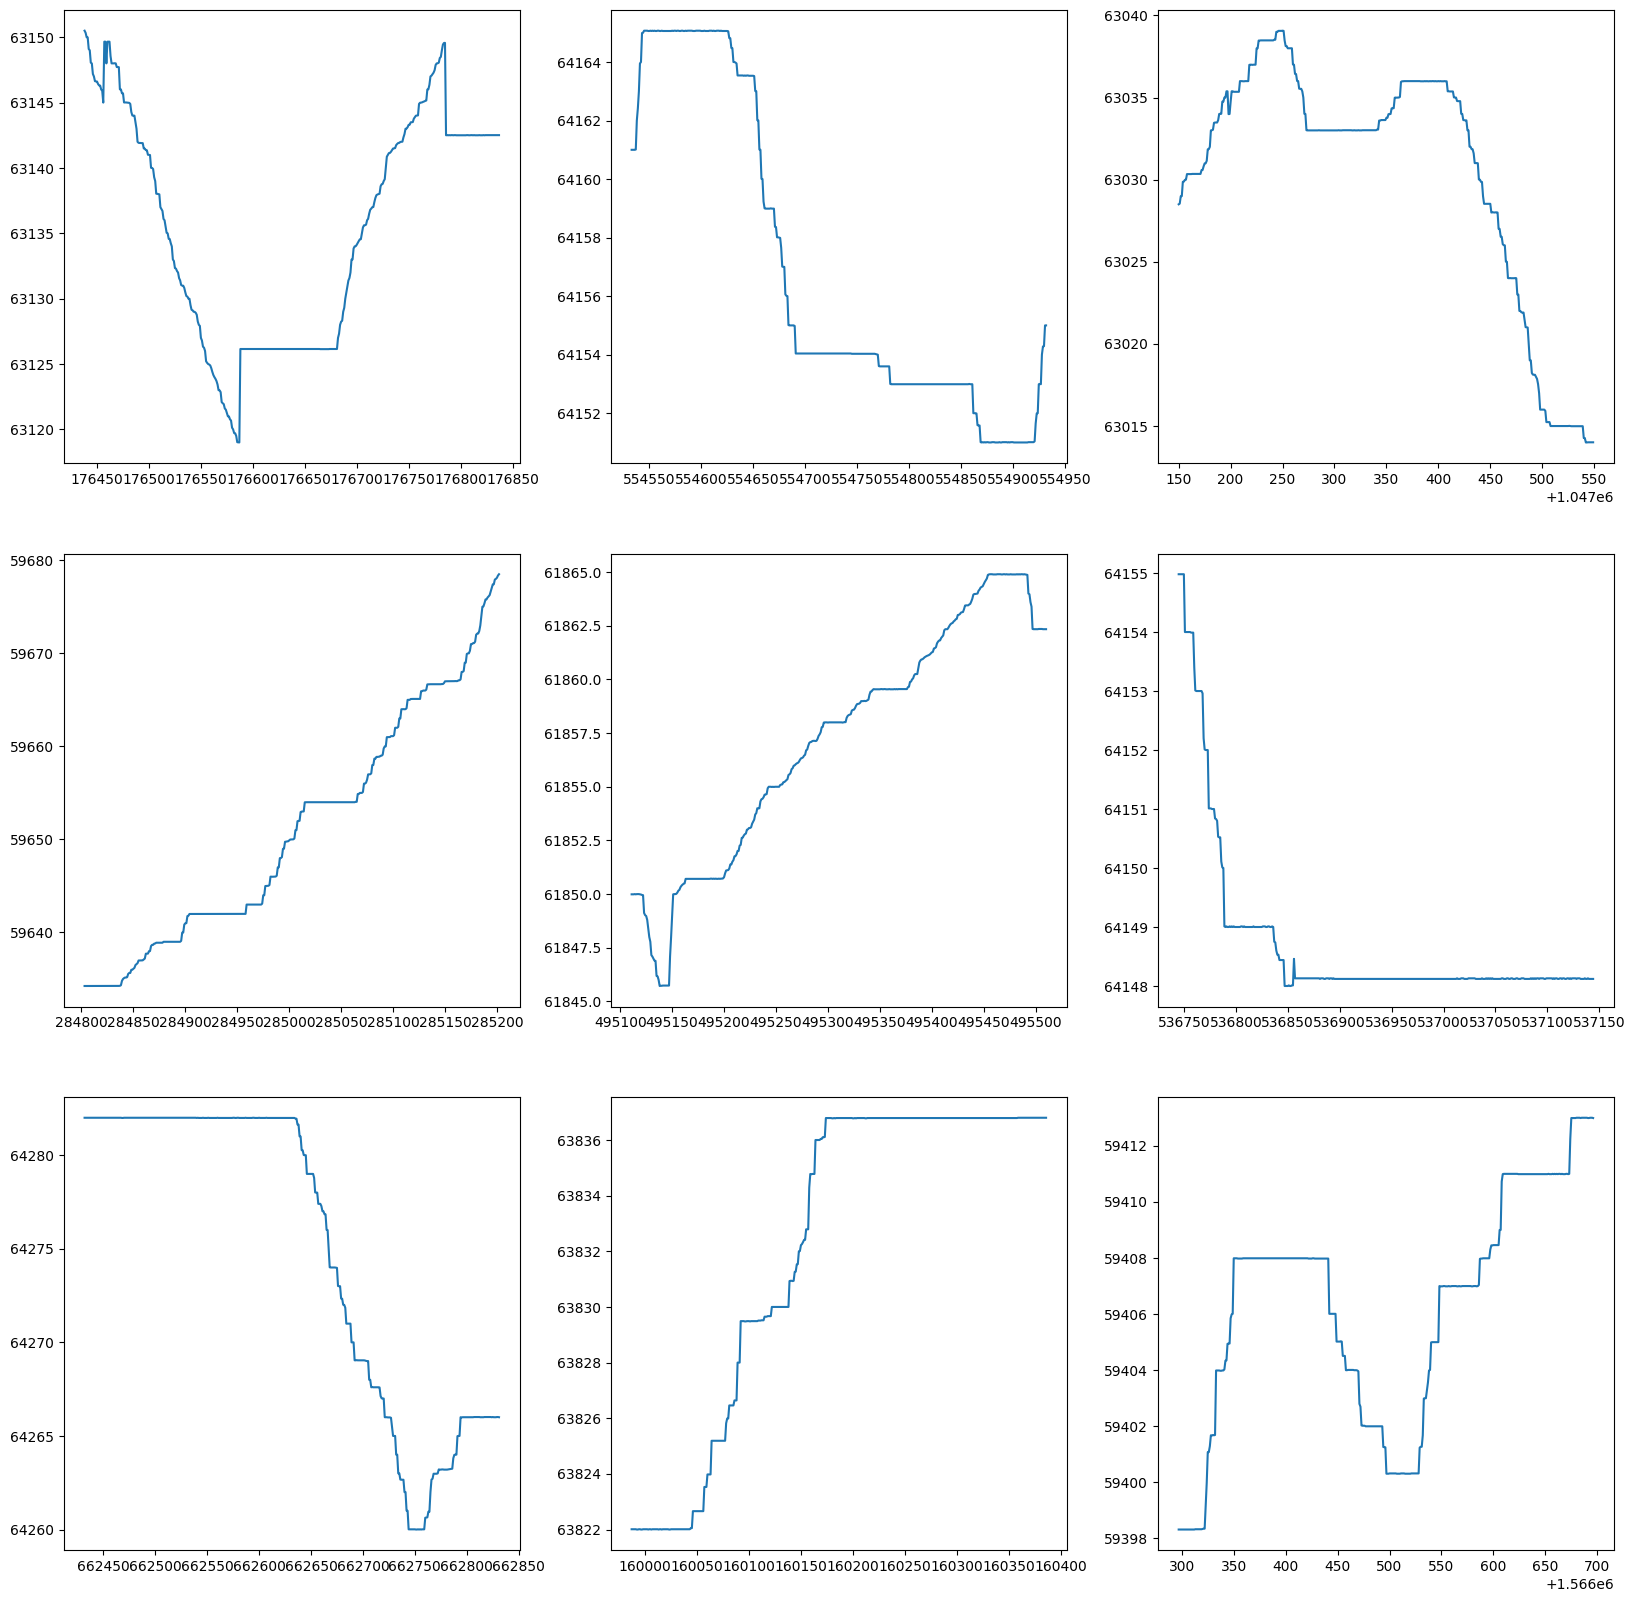

In [17]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(agg_trade_orderbook_all)-400, size=1)
    ax[idx][jdx].plot(agg_trade_orderbook_all.price[rand[0]:rand[0]+400])
    plot_idx += 1

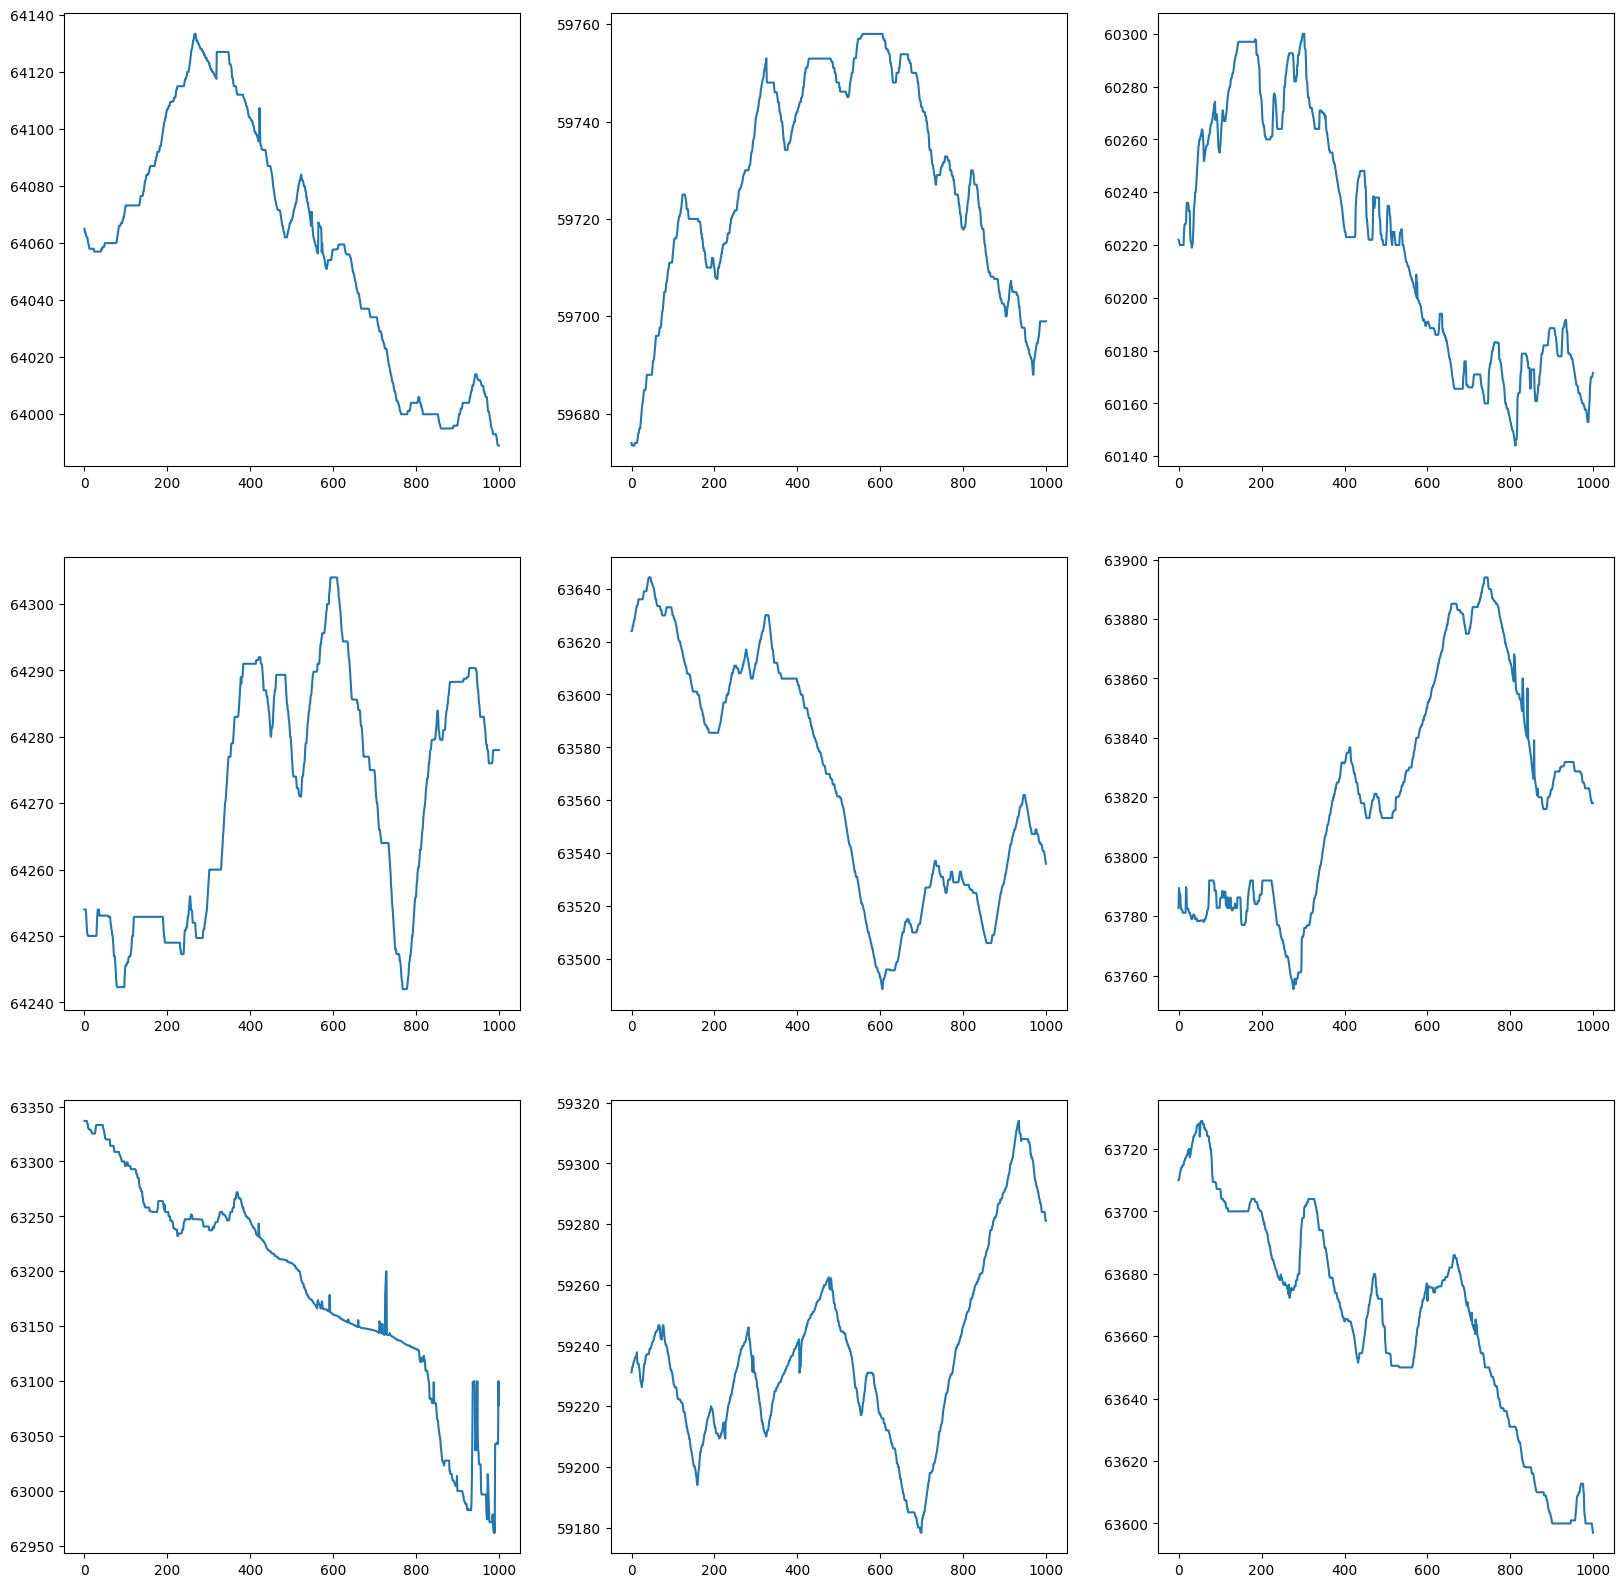

In [12]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(orderbook_clean_dollarvol_all)-1000, size=1)
    ax[idx][jdx].plot(orderbook_clean_dollarvol_all.price.to_list()[rand[0]:rand[0]+1000])
    plot_idx += 1

## Exploring LOB 

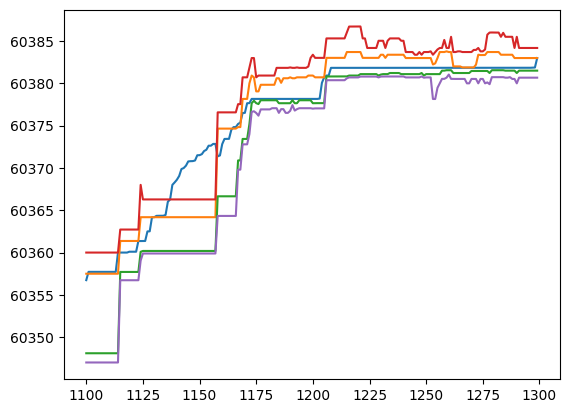

In [18]:
plt.plot(agg_trade_orderbook_all.price[1100:1300])
plt.plot(agg_trade_orderbook_all.ask5[1100:1300])
plt.plot(agg_trade_orderbook_all.bid5[1100:1300])
plt.plot(agg_trade_orderbook_all.ask10[1100:1300])
plt.plot(agg_trade_orderbook_all.bid10[1100:1300])


In [19]:
for idx in range(len(dates)):
  agg_trade_orderbook[idx]['dollarvol'] = agg_trade_orderbook[idx].quantity * agg_trade_orderbook[idx].price

In [20]:
print(np.mean(agg_trade_orderbook[0]['dollarvol']))
print(np.std(agg_trade_orderbook[0]['dollarvol']))

1557.50646872459
8221.3038888711


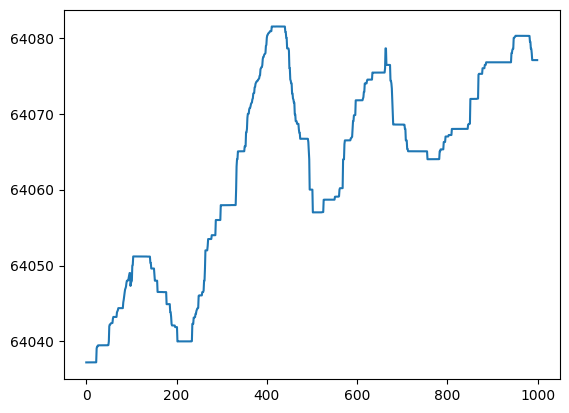

In [21]:
plt.plot(agg_trade_orderbook[1]['price'][:1000])

In [22]:
orderbook_clean_dollarvol = []

bid_cols = ['bid'+str(i) for i in range(1,11)]+['bidqty'+str(i) for i in range(1,11)]
ask_cols = ['ask'+str(i) for i in range(1,11)]+['askqty'+str(i) for i in range(1,11)]

bid_ask_cols = bid_cols+ask_cols

cols_dict = {'price':'price',
             'quantity':'quantity',
             'datetime':'datetime_y',
             'bid_ask_columns':bid_ask_cols}

for idx in range(len(dates)):
  median_dollar_vol = np.median(agg_trade_orderbook[idx]['dollarvol'])
  mean_dollar_vol = np.mean(agg_trade_orderbook[idx]['dollarvol'])

  orderbook_clean_dollarvol.append(cleaner.group_book_by_dollarvol2(agg_trade_orderbook[idx], cols_dict, mean_dollar_vol))

In [23]:
for idx, date in enumerate(dates):
  orderbook_clean_dollarvol[idx].to_csv(f'./data/input_data/{date}/orderbook_agg_trade_dollarvol.csv', index=False)
  
orderbook_clean_dollarvol[0]

,datetime,price,quantity,bid1,bid2,bid3,bid4,bid5,bid6,bid7,...,askqty1,askqty2,askqty3,askqty4,askqty5,askqty6,askqty7,askqty8,askqty9,askqty10
2024-08-23 00:00:00.386,2024-08-23 00:00:00.386,60375.839970,0.03377,60375.830000,60375.790000,60375.350000,60375.140000,60375.026667,60374.993333,60374.873333,...,0.63003,0.52971,0.00075,0.00030,0.00123,0.24240,0.52970,0.19907,0.66255,0.34279
2024-08-23 00:00:00.486,2024-08-23 00:00:00.486,60375.840000,0.02606,60375.830000,60375.790000,60375.350000,60375.140000,60375.020000,60374.980000,60374.820000,...,0.15181,0.17657,0.00025,0.00010,0.00041,0.08080,0.19865,0.00021,0.33117,0.00581
2024-08-23 00:00:00.671,2024-08-23 00:00:00.671,60375.840000,0.04707,60375.830000,60375.790000,60375.350000,60375.140000,60375.020000,60374.980000,60374.660000,...,0.04626,0.17657,0.00025,0.00010,0.00041,0.00021,0.00581,0.00666,0.11850,0.00050
2024-08-23 00:00:02.450,2024-08-23 00:00:02.450,60375.848898,0.02587,60375.840000,60375.830000,60375.736667,60375.467223,60375.237778,60375.055000,60374.850000,...,6.24392,0.00432,0.00427,0.10973,0.04160,0.05990,0.04761,1.96257,1.36398,1.88607
2024-08-23 00:00:04.096,2024-08-23 00:00:04.096,60375.850000,0.04614,60375.840000,60375.830000,60375.350000,60375.140000,60374.980000,60374.840000,60374.660000,...,0.20807,0.00031,0.00009,0.09961,0.00010,0.00041,0.00009,0.09998,0.00580,0.00666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-23 23:59:55.626,2024-08-23 23:59:55.626,64032.370032,0.36954,64032.370000,64032.250000,64032.190000,64032.160000,64032.130000,64032.000000,64031.990000,...,0.01471,0.34160,0.00020,0.00192,0.00162,0.00172,0.05402,0.00348,0.29650,0.19999
2024-08-23 23:59:55.897,2024-08-23 23:59:55.897,64032.389117,0.08583,64032.370000,64032.250000,64032.190000,64032.160000,64032.130000,64032.000000,64031.990000,...,0.49054,0.34480,0.00020,0.00192,0.00162,0.00172,0.05402,0.00678,0.21474,0.17820
2024-08-23 23:59:55.925,2024-08-23 23:59:55.925,64032.390000,0.09415,64032.375000,64032.310000,64032.230000,64032.210000,64032.190000,64032.095000,64032.075000,...,0.32425,0.17250,0.00106,0.00177,0.00167,0.00095,0.05402,0.00603,0.10746,0.19647
2024-08-23 23:59:56.014,2024-08-23 23:59:56.014,64033.285292,0.02963,64032.574002,64032.564002,64032.472002,64032.424001,64032.320000,64032.264000,64032.238000,...,0.34260,0.00049,0.00648,0.00333,0.04393,0.00075,0.10813,0.18543,0.00359,0.42957


In [24]:
orderbook_clean_dollarvol[1]

,datetime,price,quantity,bid1,bid2,bid3,bid4,bid5,bid6,bid7,...,askqty1,askqty2,askqty3,askqty4,askqty5,askqty6,askqty7,askqty8,askqty9,askqty10
2024-08-24 00:00:00.374,2024-08-24 00:00:00.374,64037.240000,0.01877,64037.23,64037.1900,64037.130,64036.540,64036.470000,64036.290000,64036.000000,...,2.51161,0.00646,0.34974,0.75390,0.12500,0.04888,0.22102,0.37826,0.22626,0.21524
2024-08-24 00:00:00.587,2024-08-24 00:00:00.587,64037.240000,0.01701,64037.23,64037.1900,64037.130,64036.540,64036.470000,64036.290000,64036.000000,...,7.45386,0.01938,1.04922,2.26170,0.37500,0.14664,0.66306,1.13478,0.67878,0.64572
2024-08-24 00:00:00.725,2024-08-24 00:00:00.725,64037.230728,0.02157,64037.23,64037.1900,64037.130,64036.540,64036.470000,64036.290000,64036.000000,...,2.47124,0.00646,0.34974,0.75390,0.12500,0.04888,0.22102,0.37826,0.22626,0.21524
2024-08-24 00:00:00.877,2024-08-24 00:00:00.877,64037.230000,0.03397,64037.23,64037.1900,64037.130,64036.540,64036.470000,64036.290000,64036.000000,...,3.70213,0.00969,0.52461,0.88199,0.50195,0.11138,0.24546,0.48877,0.41539,0.32286
2024-08-24 00:00:01.156,2024-08-24 00:00:01.156,64037.240000,0.06531,64037.23,64037.1600,64036.835,64036.505,64036.380000,64036.145000,64035.990000,...,2.29467,0.00646,0.34974,0.25618,0.75390,0.08694,0.13495,0.29964,0.29675,0.10903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-24 23:59:51.541,2024-08-24 23:59:51.541,64157.010000,0.15586,64157.00,64156.8600,64156.660,64156.600,64156.420000,64156.000000,64155.400000,...,1.88056,0.00031,0.05481,0.09112,0.00088,0.00079,0.07491,0.12480,0.09437,0.00680
2024-08-24 23:59:52.175,2024-08-24 23:59:52.175,64157.009995,2.35133,64157.00,64156.8600,64156.660,64156.600,64156.420000,64156.000000,64155.400000,...,8.68394,0.00092,0.11024,0.29186,0.18400,0.00334,0.15140,0.39942,0.43834,0.20234
2024-08-24 23:59:53.058,2024-08-24 23:59:53.058,64157.199305,0.02131,64157.15,64156.9725,64156.915,64156.795,64156.697501,64156.495002,64156.165002,...,15.29836,0.00084,0.54734,0.23147,0.54416,0.02547,0.01427,0.33015,1.05830,0.78539
2024-08-24 23:59:55.520,2024-08-24 23:59:55.520,64157.201066,0.01820,64157.20,64157.1230,64157.044,64156.995,64156.953000,64156.863000,64156.763000,...,29.51285,0.03670,0.00790,0.83901,0.27952,0.07125,1.23306,0.05024,1.33921,2.55546


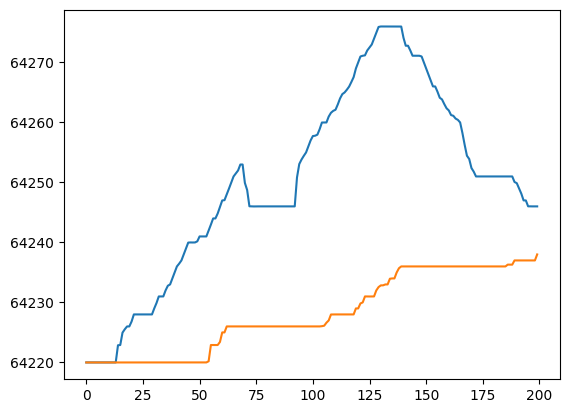

In [25]:
plt.plot(orderbook_clean_dollarvol[3]['price'][:200].to_list())
plt.plot(agg_trade_orderbook[3]['price'][:200].to_list())

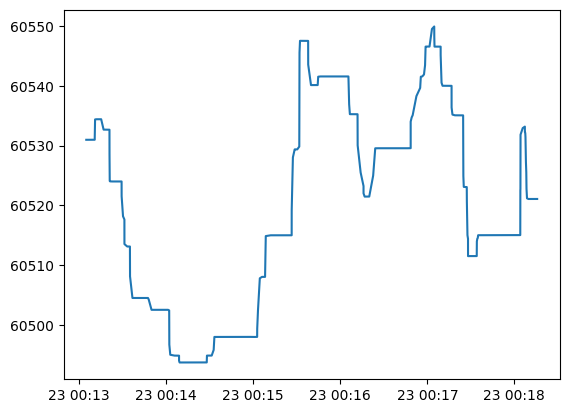

In [26]:
plt.plot(orderbook_clean_dollarvol[0].price[1100:1500])

In [27]:
orderbook_clean_dollarvol[1] = orderbook_clean_dollarvol[1].assign(
    vwap=orderbook_clean_dollarvol[1].eval(
        'wgtd = price * quantity', inplace=False
    ).groupby(orderbook_clean_dollarvol[1].index.date).cumsum().eval('wgtd / quantity')
)

orderbook_clean_dollarvol[1] 

TypeError: datetime64 type does not support cumsum operations

In [28]:
plt.plot(orderbook_clean_dollarvol[1].vwap.to_list()[:])
plt.plot(orderbook_clean_dollarvol[1].price.to_list()[:])


AttributeError: 'DataFrame' object has no attribute 'vwap'

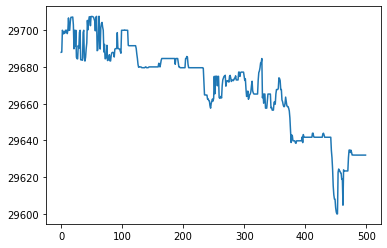

In [149]:
plt.plot(orderbook_clean_dollarvol[1].price.to_list()[:500])

## Orderbook

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from utils import cleaner
import utils.plotter as plotter

In [2]:
dates = ['09-Jun-2022','10-Jun-2022','11-Jun-2022','12-Jun-2022','13-Jun-2022','14-Jun-2022','16-Jun-2022','17-Jun-2022']
dates = ['13-Aug-2024','14-Aug-2024','15-Aug-2024','16-Aug-2024']
dates = ['15-Aug-2024','16-Aug-2024']


orderbook = []

for idx, date in enumerate(dates):
    orderbook.append(pd.read_csv(f'./data/input_data/{date}/orderbook.csv'))

In [3]:
for idx, date in enumerate(dates):
    orderbook[idx]['w_midprice'] = (orderbook[idx]['ask1']*orderbook[idx]['askqty1']+orderbook[idx]['bid1']*orderbook[idx]['bidqty1'])/(orderbook[idx]['askqty1']+orderbook[idx]['bidqty1'])

orderbook_all = pd.concat(orderbook)

In [4]:
orderbook_all.index = orderbook_all['datetime']

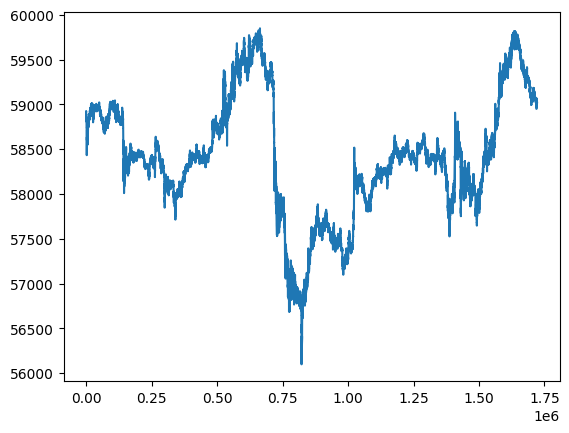

In [5]:
plt.plot(orderbook_all.w_midprice.to_list())

In [7]:
orderbook_all.shape
orderbook_all.to_csv('./data/input_data/all/orderbook.csv')

KeyError: 476562

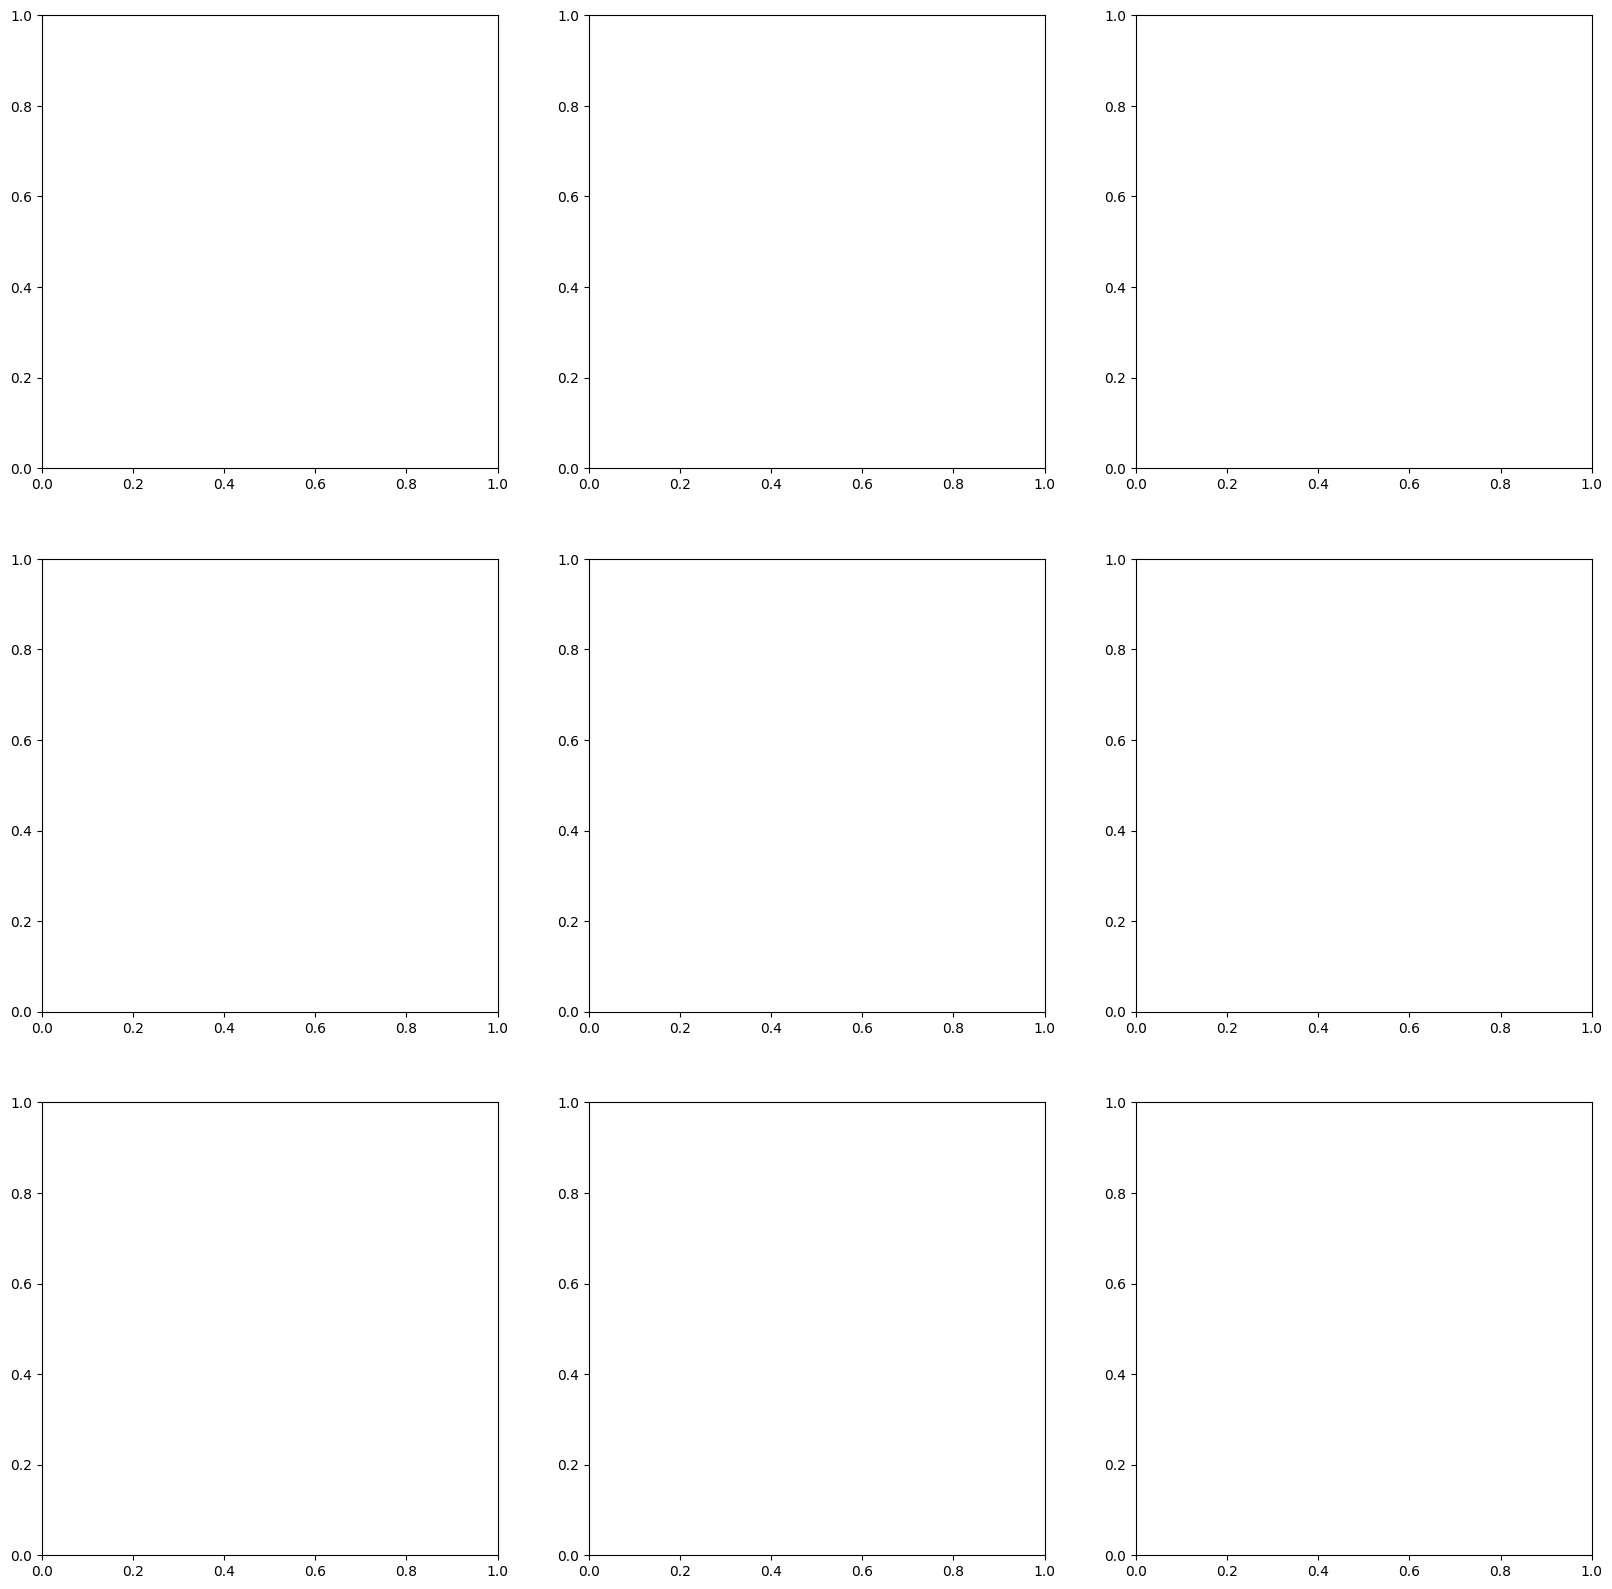

In [8]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(orderbook_all)-1000, size=1)
    # duration = (datetime.datetime.strptime(orderbook_all.datetime[rand[0]+1000],'%Y-%m-%d %H:%M:%S.%f') - datetime.datetime.strptime(orderbook_all.datetime[rand[0]],'%Y-%m-%d %H:%M:%S.%f')).seconds 
    updates = orderbook_all.lastUpdatedId[rand[0]+1000]-orderbook_all.lastUpdatedId[rand[0]]
    ax2 = ax[idx][jdx].twinx()
    ax[idx][jdx].plot(orderbook_all.w_midprice.tolist()[rand[0]:rand[0]+1000])
    ax2.plot(orderbook_all.askqty1.to_list()[rand[0]:rand[0]+1000], color='orange')
    ax2.plot(orderbook_all.bidqty1.to_list()[rand[0]:rand[0]+1000], color='red')
    ax[idx][jdx].set_title(f'Updates {updates}')
    plot_idx += 1

In [9]:
orderbook_all['update_diff'] = orderbook_all['lastUpdatedId'] - orderbook_all['lastUpdatedId'].shift(1)


count    1.721698e+06
mean     5.905608e+01
std      1.212349e+02
min      1.000000e+00
25%      9.000000e+00
50%      1.900000e+01
75%      4.400000e+01
max      2.535000e+03
Name: update_diff, dtype: float64


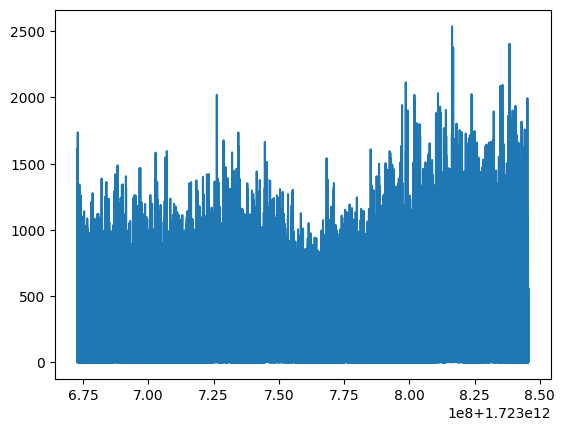

In [10]:
print(orderbook_all['update_diff'].describe())
plt.plot((orderbook_all['update_diff']))

In [11]:
orderbook_all.to_csv('./data/input_data/all/orderbook_test.csv')

In [12]:
orderbook_all_active = orderbook_all[orderbook_all['update_diff'] > 9]

In [13]:
orderbook_all_active.to_csv('./data/input_data/all/orderbook_active.csv')

count    1.275640e+06
mean     7.774622e+01
std      1.359669e+02
min      1.000000e+01
25%      1.600000e+01
50%      2.700000e+01
75%      6.400000e+01
max      2.535000e+03
Name: update_diff, dtype: float64


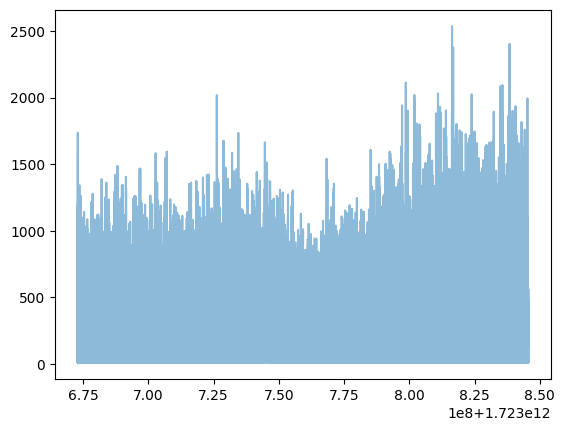

In [23]:
print(orderbook_all_active['update_diff'].describe())
plt.plot((orderbook_all_active['update_diff']),alpha=0.5)

KeyError: 457738

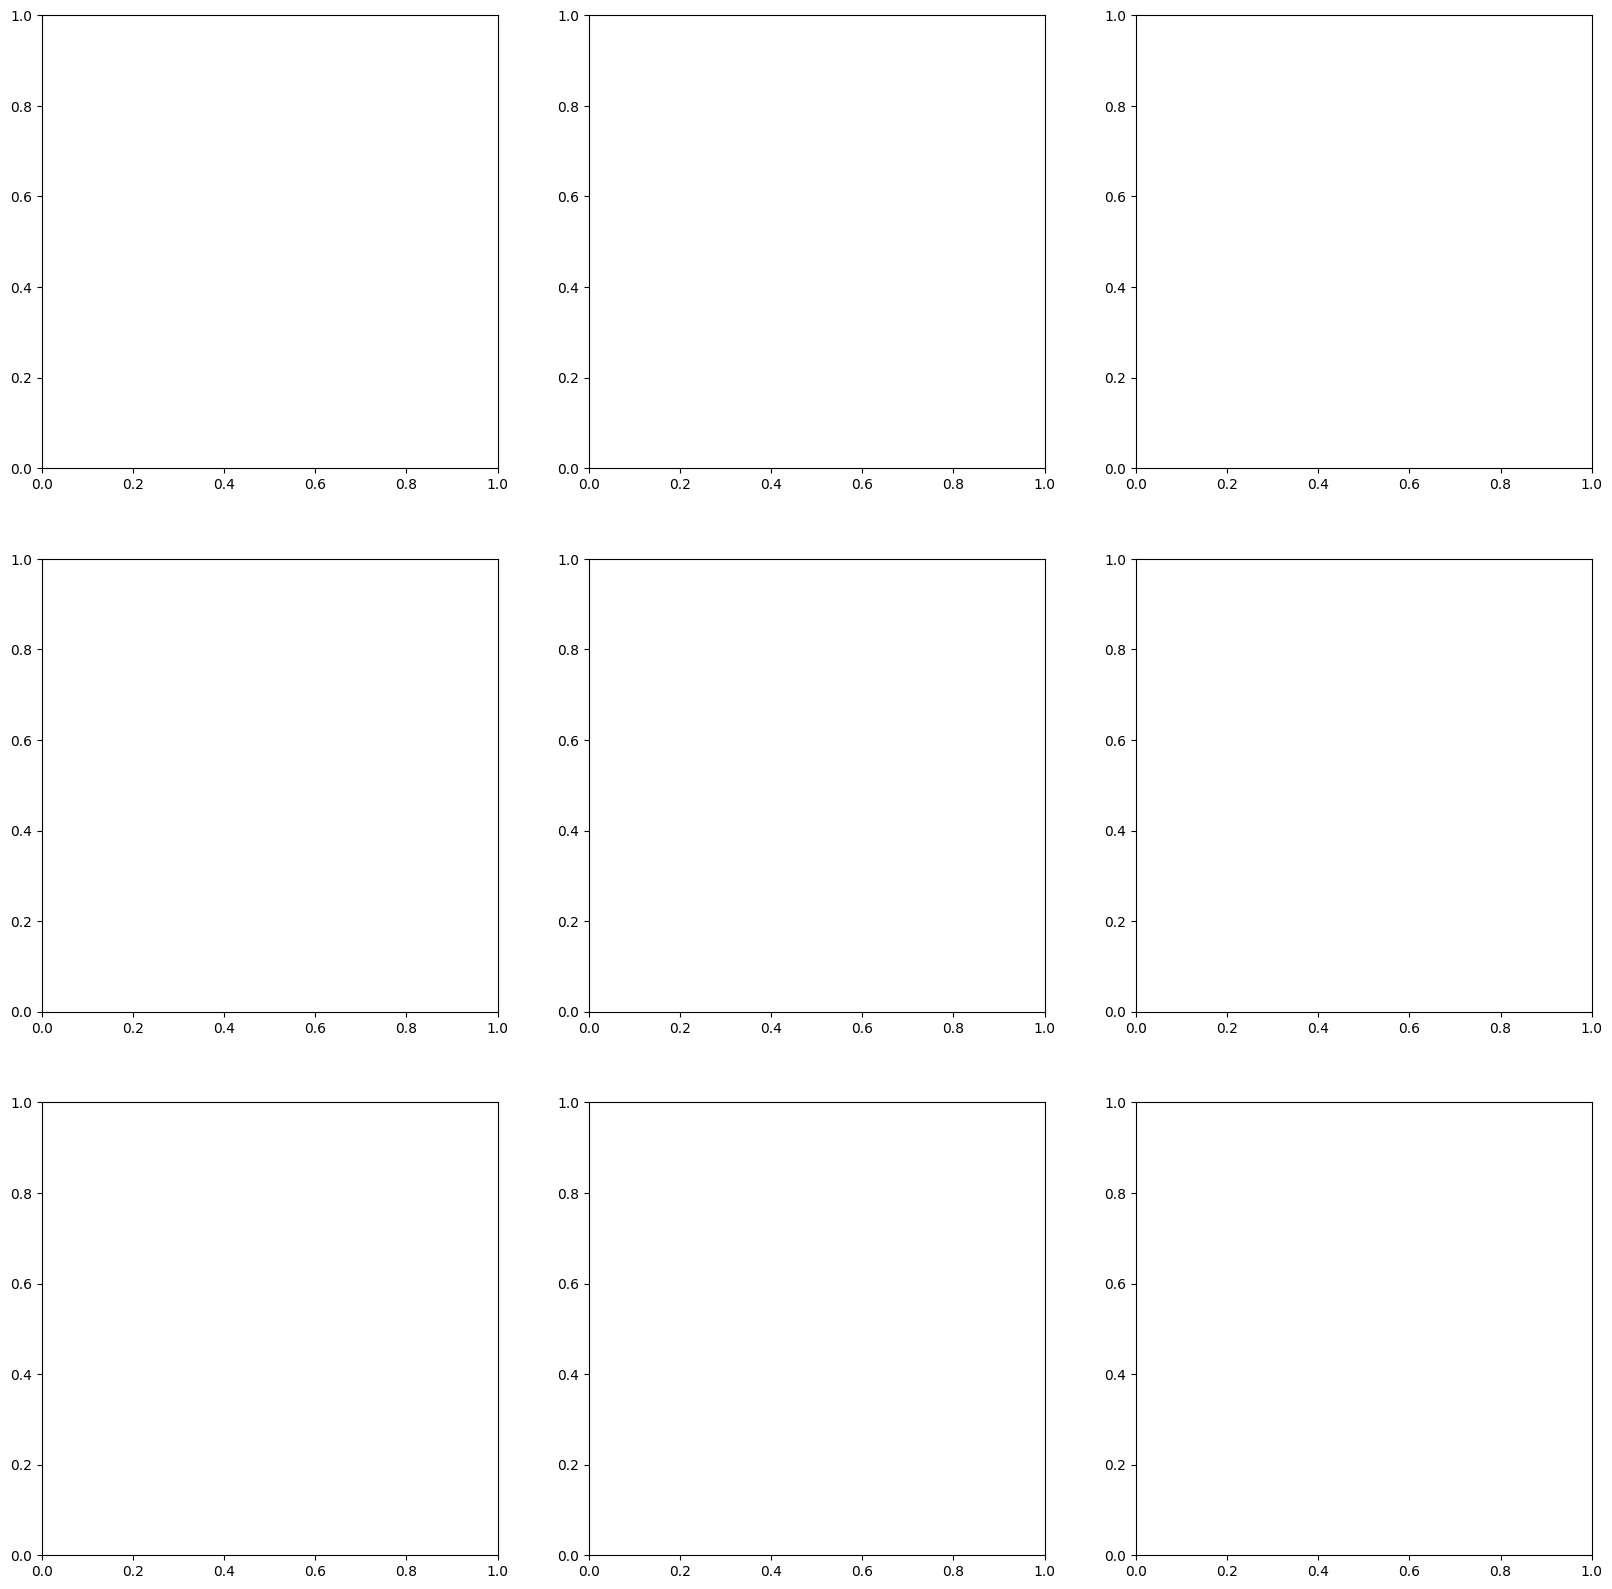

In [46]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(orderbook_all_active)-1000, size=1)
    updates = orderbook_all_active.lastUpdatedId[rand[0]+1000]-orderbook_all_active.lastUpdatedId[rand[0]]
    ax2 = ax[idx][jdx].twinx()
    ax[idx][jdx].plot(orderbook_all_active.w_midprice.tolist()[rand[0]:rand[0]+1000])
    ax2.plot(orderbook_all_active.askqty1.to_list()[rand[0]:rand[0]+1000], color='orange')
    ax2.plot(orderbook_all_active.bidqty1.to_list()[rand[0]:rand[0]+1000], color='red')
    ax[idx][jdx].set_title(f'Updates {updates}')
    plot_idx += 1

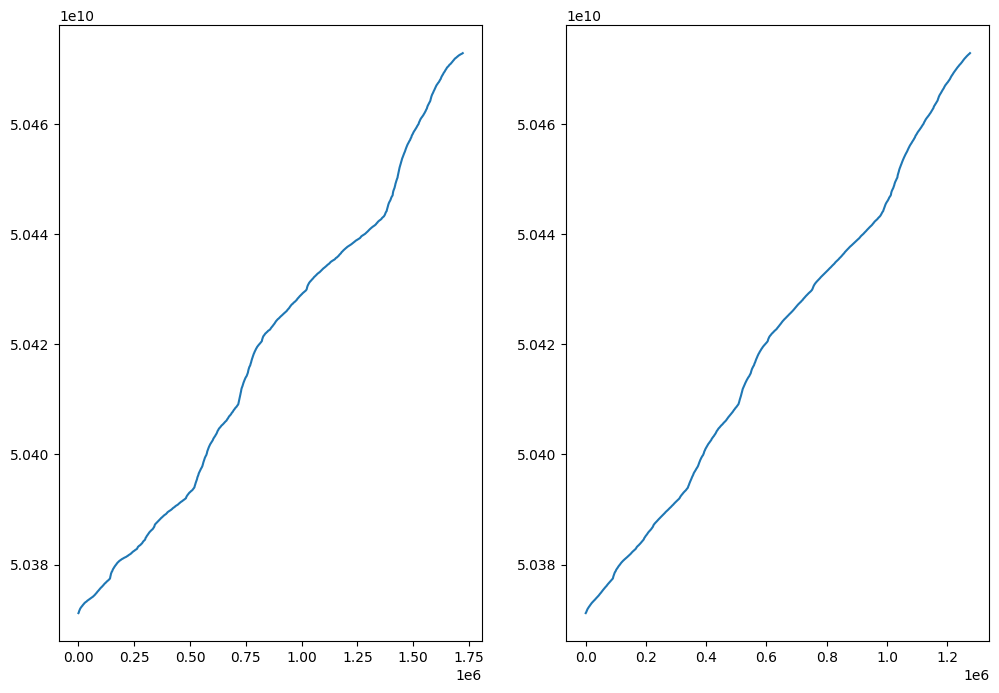

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (12, 8))

ax[0].plot(orderbook_all.lastUpdatedId.to_list())
ax[1].plot(orderbook_all_active.lastUpdatedId.to_list())

In [15]:
id2 = np.array(orderbook_all.lastUpdatedId.to_list()[1:])
id1 = np.array(orderbook_all.lastUpdatedId.to_list()[:-1])

In [16]:
diff = id2-id1

print(f'mean: {np.mean(diff)}')
print(f'std: {np.std(diff)}')
print(f'min: {np.min(diff)}')

mean: 59.05608300642738
std: 121.23482187196545
min: 1


In [17]:
orderbook_all = pd.read_csv('./data/input_data/all/orderbook.csv')

In [18]:
orderbook_all['returns'] = (orderbook_all['w_midprice']-orderbook_all['w_midprice'].shift(1))/orderbook_all['w_midprice'].shift(1)
orderbook_all['log_returns'] = (np.log(orderbook_all['w_midprice'])-np.log(orderbook_all['w_midprice'].shift(1)))

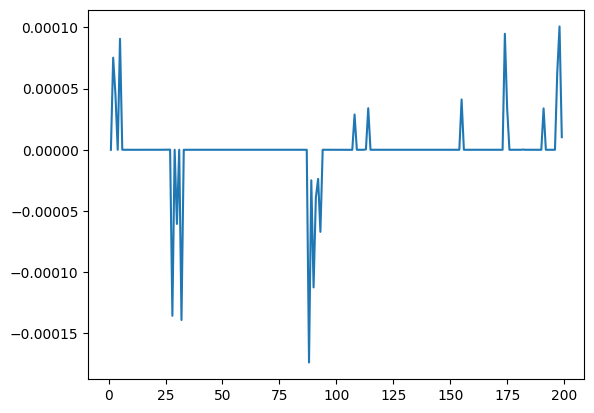

In [19]:
plt.plot(orderbook_all.log_returns[:200])

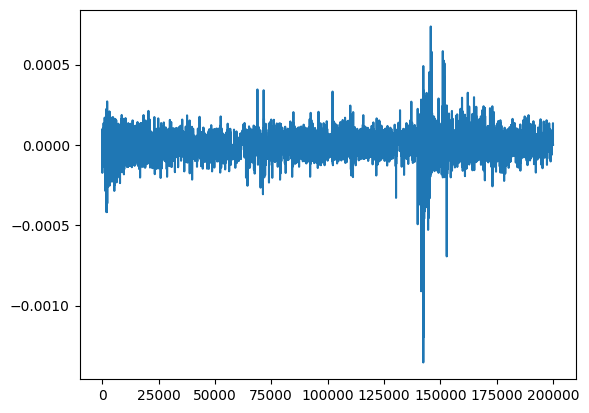

In [20]:
plt.plot(orderbook_all.returns[:200_000])

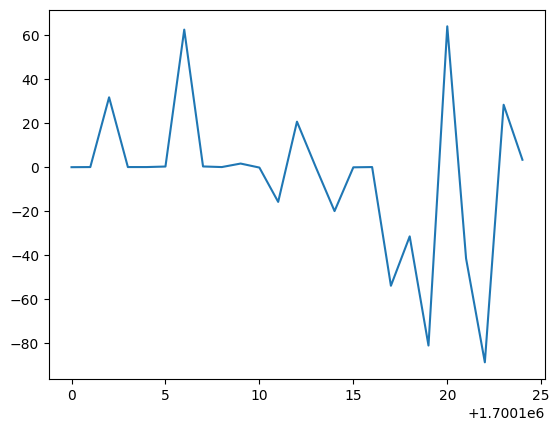

In [21]:
idx=1700000
plt.plot((orderbook_all.returns[idx+100:idx+125]/np.subtract(*np.percentile(orderbook_all.returns[idx:idx+100], [75, 25], axis=0)))-np.mean(orderbook_all.returns[idx:idx+100]))

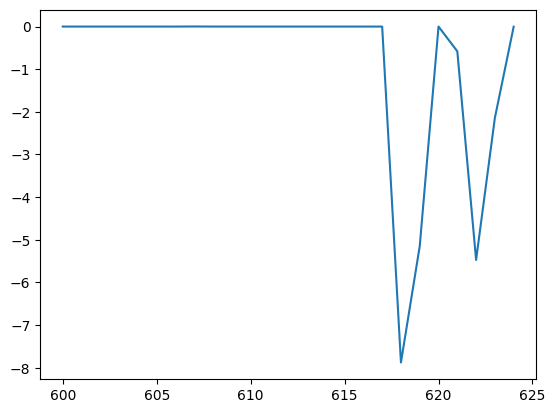

In [22]:
idx=500
plt.plot(orderbook_all.returns[idx+100:idx+125]/np.std(orderbook_all.returns[idx:idx+100])-np.median(orderbook_all.returns[idx:idx+100]))

In [23]:
orderbook = pd.read_csv('./data/input_data/all/orderbook.csv')

In [24]:
orderbook['rate_lag30'] = np.log(orderbook['w_midprice']/orderbook['w_midprice'].shift(periods=-30))
orderbook['rate_lag15'] = np.log(orderbook['w_midprice']/orderbook['w_midprice'].shift(periods=-15))
orderbook['rate_lag1'] = np.log(orderbook['w_midprice']/orderbook['w_midprice'].shift(periods=-1))

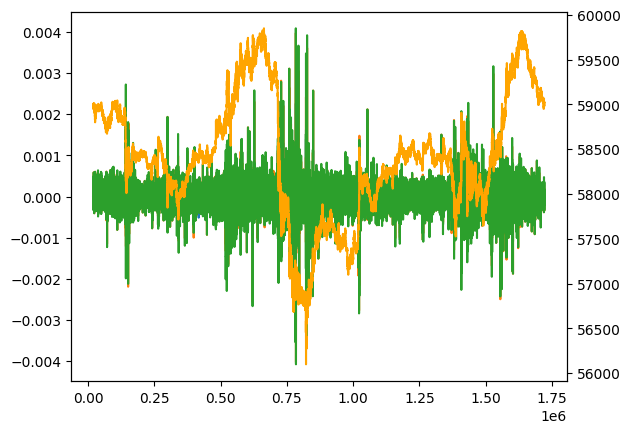

In [25]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(orderbook.rate_lag1[2_00_00:2_002_000])
ax1.plot(orderbook.rate_lag15[2_00_00:2_002_000])
ax1.plot(orderbook.rate_lag30[2_00_00:2_002_000])
ax2.plot(orderbook.w_midprice[2_00_00:2_002_000], color='orange')

In [26]:
orderbook['returns_lag'] = np.log(orderbook['w_midprice'].shift(1)/orderbook['w_midprice'].shift(2))*10000
orderbook['mid_price_diff'] = orderbook['w_midprice']-orderbook['w_midprice'].shift(1)

In [27]:
orderbook_2 = orderbook[orderbook['mid_price_diff'] != 0]
orderbook_2.drop(columns=['returns_lag','mid_price_diff'], inplace=True)

/tmp/ipykernel_272776/2347865041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderbook_2.drop(columns=['returns_lag','mid_price_diff'], inplace=True)


In [63]:
orderbook_2

,datetime,datetime.1,lastUpdatedId,ask1,askqty1,ask2,askqty2,ask3,askqty3,ask4,...,bid8,bidqty8,bid9,bidqty9,bid10,bidqty10,w_midprice,rate_lag30,rate_lag15,rate_lag1
0,1723672800072,1723672800072,50371186639,58913.57,0.21693,58913.58,0.00009,58913.59,0.00824,58913.61,...,58912.01,0.05015,58912.00,0.08970,58911.52,0.04895,58913.560691,-0.000015,-2.109726e-04,0.000000e+00
2,1723672800583,1723672800583,50371187076,58918.00,0.10629,58918.67,0.00010,58918.68,0.01012,58919.27,...,58915.12,0.02130,58915.01,0.39319,58915.00,0.10991,58917.990403,0.000199,-1.357866e-04,-4.515754e-05
3,1723672800592,1723672800592,50371187497,58920.66,0.26722,58920.93,0.00040,58920.94,0.00021,58921.38,...,58919.51,0.22731,58918.94,0.09129,58918.78,0.02130,58920.651054,0.000244,-9.063555e-05,8.381911e-09
4,1723672800594,1723672800594,50371187938,58920.66,0.16217,58920.93,0.00040,58920.94,0.00021,58923.99,...,58919.52,0.24476,58919.51,0.22731,58919.49,0.03323,58920.650560,0.000244,-9.064393e-05,-9.063357e-05
5,1723672800605,1723672800605,50371188368,58926.00,0.27527,58926.48,0.00009,58926.49,0.70000,58927.23,...,58922.46,0.04895,58922.00,0.08970,58921.64,0.24500,58925.990991,0.000335,-1.036040e-08,-1.581766e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721692,1723845599303,1723845599303,50472863160,59023.98,2.71158,59024.02,0.00355,59024.62,0.11757,59024.66,...,59019.44,0.00595,59018.02,0.00013,59017.31,0.08471,59023.977759,NaN,NaN,-2.011034e-08
1721693,1723845599403,1723845599403,50472863267,59023.98,2.74170,59024.02,0.00355,59024.66,0.00088,59026.26,...,59019.76,0.02406,59018.02,0.00013,59017.75,0.04000,59023.978946,NaN,NaN,-1.091536e-09
1721694,1723845599503,1723845599503,50472863319,59023.98,2.93762,59024.02,0.00355,59024.66,0.00088,59026.27,...,59018.02,0.00013,59017.76,0.02401,59017.75,0.04000,59023.979011,NaN,NaN,1.748157e-12
1721695,1723845599603,1723845599603,50472863334,59023.98,2.93728,59024.02,0.00355,59024.66,0.00088,59026.27,...,59017.75,0.04000,59017.35,0.00040,59017.27,0.02364,59023.979011,NaN,NaN,0.000000e+00


In [64]:
orderbook_2.to_csv('./data/input_data/all/orderbook_test.csv', index=False)

In [65]:
orderbook_2['lag_return'] = np.log(orderbook_2['w_midprice'].shift(10)/orderbook_2['w_midprice'].shift(10+1))

/tmp/ipykernel_58774/3076540589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderbook_2['lag_return'] = np.log(orderbook_2['w_midprice'].shift(10)/orderbook_2['w_midprice'].shift(10+1))


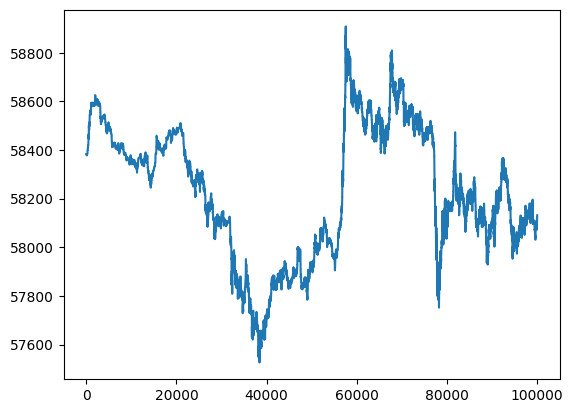

In [66]:
plt.plot(orderbook_2.w_midprice[1_000_000:1_100_000].to_list())

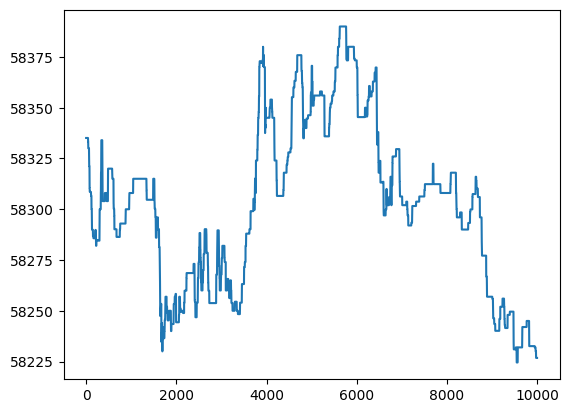

In [68]:
plt.plot(orderbook_2.w_midprice[2_00_000:2_100_00].to_list())